In [0]:
sc

SparkContext 

 Spark UI 

 
 Version 
 v3.1.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

Ćwiczenie: describe

Odczytaj schemat z plików znajdujących się pod ścieżką /databricks-datasets/wine-quality. Dla przykładu możesz wziąć pod uwagę tylko kolor czerwony wina. Zwróć uwagę, że plik rozdzielony jest średnikami, więc będzie potrzeba użycia option przy odczycie CSV. Pamiętaj też o wymuszeniu schematu podczas odczytu i że pierwszą linijką są nazwy kolumn, a nie dane właściwe. Następnie, żeby sprawdzić, jak Ci poszło, użyj head.

In [0]:
df_wine = spark.read.option("delimiter", ";").option("inferSchema", "true").option("header", "true").csv("/databricks-datasets/wine-quality")
df_wine.head(2)

[Row(fixed acidity='7', volatile acidity=0.27, citric acid=0.36, residual sugar=20.7, chlorides=0.045, free sulfur dioxide=45.0, total sulfur dioxide=170.0, density=1.001, pH=3.0, sulphates=0.45, alcohol=8.8, quality=6),
 Row(fixed acidity='6.3', volatile acidity=0.3, citric acid=0.34, residual sugar=1.6, chlorides=0.049, free sulfur dioxide=14.0, total sulfur dioxide=132.0, density=0.994, pH=3.3, sulphates=0.49, alcohol=9.5, quality=6)]

Ćwiczenie: kryteria filter

Metoda select ma zaprogramowany wytrych, który daje Ci możliwość zebrania wszystkich wierszy jednym wyrażeniem. Zastosuj to do zbioru statystyk wina, który już wcześniej obrabialiśmy. Przypominamy, znajduje się pod ścieżką /databricks-datasets/wine-quality. Zwróć DF, w którym są wina, które zawierają wysoką zawartość alkoholu, powiedzmy powyżej 13%. Ile jest takich wpisów?

In [0]:
df_wine = spark.read.option("delimiter", ";").option("inferSchema", "true").option("header", "true").csv("/databricks-datasets/wine-quality")
df_wine.head(2)

[Row(fixed acidity='7', volatile acidity=0.27, citric acid=0.36, residual sugar=20.7, chlorides=0.045, free sulfur dioxide=45.0, total sulfur dioxide=170.0, density=1.001, pH=3.0, sulphates=0.45, alcohol=8.8, quality=6),
 Row(fixed acidity='6.3', volatile acidity=0.3, citric acid=0.34, residual sugar=1.6, chlorides=0.049, free sulfur dioxide=14.0, total sulfur dioxide=132.0, density=0.994, pH=3.3, sulphates=0.49, alcohol=9.5, quality=6)]

In [0]:
df_wine_high = df_wine.filter(
    df_wine["alcohol"] >= '13'
)
#display(df_wine_high)

In [0]:
df_wine.count()

6513

Ćwiczenie: nowa kolumna

Stwórz nową kolumnę dla zbioru adult, która będzie się nazywać race_lowercase i będzie zawierać — no zgadnij :) — rasę badanego człowieka pisaną małymi znakami. Zadanie dla ambitnych — możesz też przy okazji pozbyć się pustych znaków.

Tak jak wspomniano, na początku możesz zmienić nazwę kolumny, gdy użyjesz funkcji withColumnRenamed. Pamiętaj, polecenie to nie zmodyfikuje istniejącego DF, raczej stworzy jego kopię wraz ze zmienioną nazwą.

In [0]:
path_adult = "/databricks-datasets/adult/adult.data"
df_adult = spark.read.csv(path_adult)
df_adult_with_schema = spark.read.csv(path_adult, inferSchema=True)

In [0]:
from pyspark.sql.types import StructField, StructType, StringType, IntegerType

fields = [
    StructField("age", IntegerType(), True),
    StructField("workclass", StringType(), True),
    StructField("fnlwgt", IntegerType(), True),
    StructField("education", StringType(), True),
    StructField("education-num", IntegerType(), True),

    StructField("marital-status", StringType(), True),
    StructField("occupation", StringType(), True),
    StructField("relationship", StringType(), True),
    StructField("race", StringType(), True),
    StructField("sex", StringType(), True),

    StructField("capital-gain", IntegerType(), True),
    StructField("capital-loss", IntegerType(), True),
    StructField("hours-per-week", IntegerType(), True),
    StructField("native-country", StringType(), True),
    StructField("label", StringType(), True),
]

schema = StructType(fields)

df_adult = spark.read.csv(path_adult, schema=schema)

In [0]:
import pyspark.sql.functions as F
df_adult_race = df_adult.withColumn("race",F.lower(F.col("race")))
df_adult_race_lower = df_adult_race.withColumnRenamed("race", "race_lowercase")

#display(df_adult_race_lower)

Zadanie: szukamy reguł
W tym zadaniu zainteresujemy się tym, jak młody wiek wpływa na takie cechy jak tygodniowy czas pracy albo stan cywilny (marital-status).
Możesz posłużyć się tym krótkim fragmentem kodu do stworzenia odpowiedniego DF.

In [0]:
path_adult = "/databricks-datasets/adult/adult.data"

field_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "label"
]

df_adult = spark.read.csv(path_adult)
df_adult = df_adult.toDF(*field_names)

Najpierw ze zbioru pozbądź się duplikatów. Potem stwórz w nim nową kolumnę – is young, która będzie zależna od wartości kolumny age.
Niech wiek 35 będzie granicą młodości, a więc wszystkich poniżej 35 roku życia uznajemy za młodych.

Będziemy też potrzebować kolumny tłumaczącej czas pracy na kategorie. Załóżmy istnienie dwóch kategorii: fulltime (> 39 godzin), 
parttime (< 39 godzin).

Następnie stwórz dwa zbiory: młodych i starszych respondentów. Do tego rozgraniczenia wykorzystaj kolumnę, którą przed chwilą stworzyliśmy.

Dla tych grup porównaj ilości elementów w grupach wartości czasu pracy i stanu cywilnego. Czy dostrzegasz jakieś reguły? Jeśli potrafisz, stwórz też wykresy słupkowe, które ukazują takie zależności.

In [0]:
df_adult.drop_duplicates().count()

32537

In [0]:
# check
df_adult.count()

32561

In [0]:
#wymiana na df bez duplikatów
df_adult = df_adult.drop_duplicates()

In [0]:
import pyspark.sql.functions as F
df_adult = df_adult.withColumn(
    "is young",
    F.when(F.trim(F.col("age")) < "35", "young").otherwise("too_old_to_die_young")
)

#display(df_adult)

Będziemy też potrzebować kolumny tłumaczącej czas pracy na kategorie. Załóżmy istnienie dwóch kategorii: fulltime (> 39 godzin), 
parttime (< 39 godzin).

In [0]:
df_adult = df_adult.withColumn(
    "work_time",
    F.when(F.trim(F.col("hours-per-week")) > "39", "fulltime").otherwise("parttime")
)
#display(df_adult)

Następnie stwórz dwa zbiory: młodych i starszych respondentów. Do tego rozgraniczenia wykorzystaj kolumnę, którą przed chwilą stworzyliśmy.

In [0]:
df_adult.groupby('is young').count().collect()

[Row(is young='young', count=14035),
 Row(is young='too_old_to_die_young', count=18502)]

In [0]:
df_young = df_adult.where(
    df_adult["is young"] == 'young'
)
#display(df_young)

In [0]:
df_too_old_to_die_young = df_adult.where(
    df_adult["is young"] == 'too_old_to_die_young'
)
#display(df_too_old_to_die_young)

Dla tych grup porównaj ilości elementów w grupach wartości czasu pracy i stanu cywilnego. Czy dostrzegasz jakieś reguły? 
Jeśli potrafisz, stwórz też wykresy słupkowe, które ukazują takie zależności.

1. Czas pracy

In [0]:
df_young_pandas = df_young.toPandas()
young = df_young_pandas['work_time'].value_counts()
young

fulltime 9954
parttime 4081
Name: work_time, dtype: int64

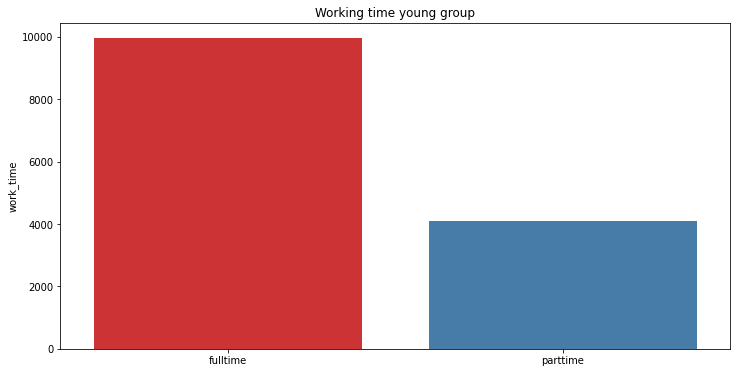

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title ('Working time young group')
sns.barplot(x=young.index, y= young, palette='Set1');

W grupie młodych ok 14 k pracowników, na pełnym etacie pracowało 9963 co stanpwiło ok 60 % pracowników młodych
do ok 40 procent 4086 pracowników pracująych na umowach czasowych

In [0]:
df_olders_pandas = df_too_old_to_die_young.toPandas()
olders = df_olders_pandas['work_time'].value_counts()
olders

fulltime 15193
parttime 3309
Name: work_time, dtype: int64

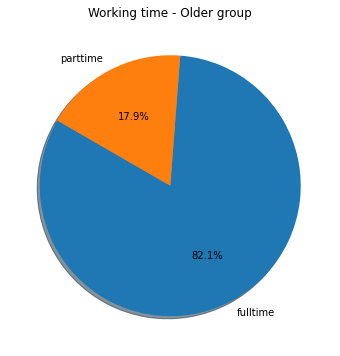

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title ('Working time - Older group')
plt.pie(olders,labels= olders.index, autopct='%1.1f%%',startangle=150,shadow=True);

W grupie liczniejszej starszych ok 18 500 pracowników, na pełnym etacie pracowało 15202 co stanpwiło ok 82 % pracowników starszych
do ok 18 % procent 3310 pracowników pracująych na umowach czasowych.

Graupa starszych pracowników była liczniejsza oraz częściej pracowała na pełnym etacie. 40 procent pracowników młodych pracowało na umowach czasowych, do ok. 18 % pracowników starszych

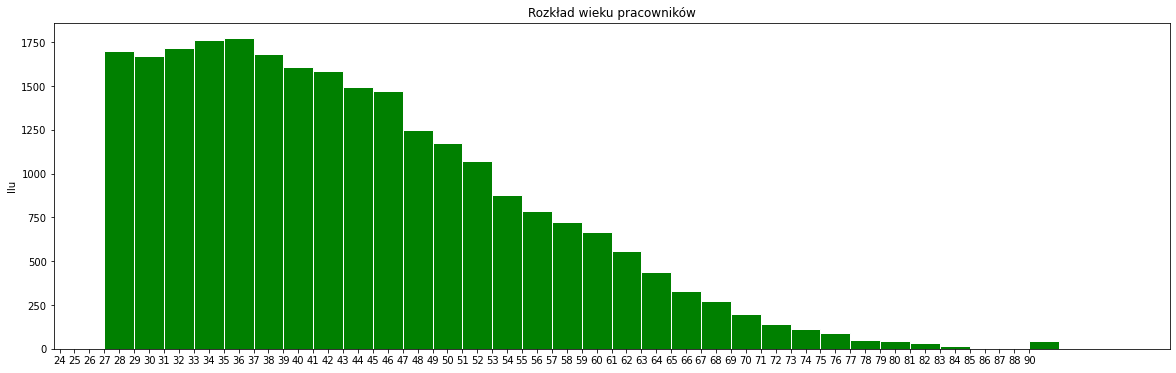

In [0]:
import numpy as np
df_adults_pandas = df_adult.toPandas()
df3 = df_adults_pandas.sort_values(by='age',ascending=True)  
plt.figure(figsize=(20,6))
plt.title ('Rozkład wieku pracowników')
plt.ylabel('Ilu')
plt.hist(df3.age, bins = np.arange(10,80,2), color='green', edgecolor = 'white');


W wieku globalnym pracowników powyżej najwyższe zatrdunienie powyżej 1000 przypadło w grupie od 27 dp 47 lat,
najwięcej pracowników było wieku od 35 do 37 lat

2. Status Małżeński

In [0]:
status_young = df_young_pandas['marital-status'].value_counts()
status_young

Never-married 8522
 Married-civ-spouse 3975
 Divorced 970
 Separated 373
 Married-spouse-absent 150
 Widowed 29
 Married-AF-spouse 16
Name: marital-status, dtype: int64

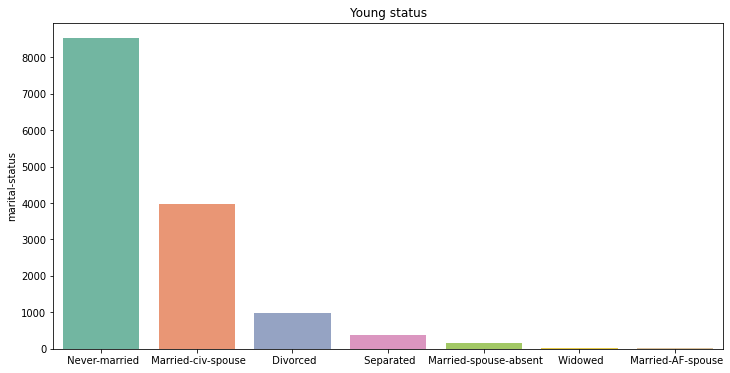

In [0]:
plt.figure(figsize=(12,6))
plt.title ('Young status')
sns.barplot(x=status_young.index, y= status_young, palette='Set2');

In [0]:
status_older = df_olders_pandas['marital-status'].value_counts()
status_older

Married-civ-spouse 10995
 Divorced 3471
 Never-married 2145
 Widowed 964
 Separated 652
 Married-spouse-absent 268
 Married-AF-spouse 7
Name: marital-status, dtype: int64

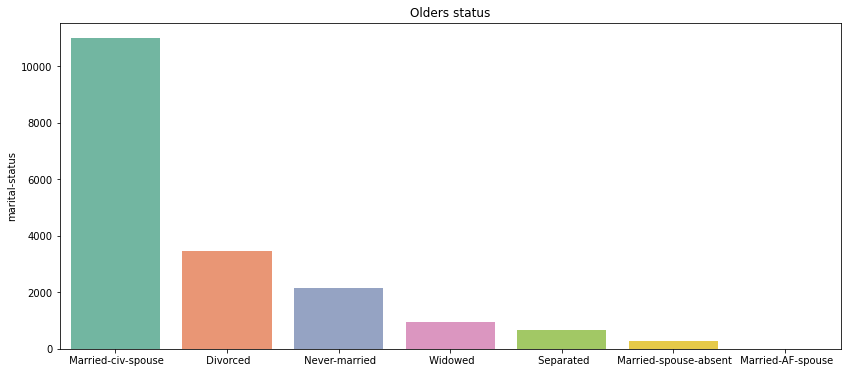

In [0]:
plt.figure(figsize=(14,6))
plt.title ('Olders status')
sns.barplot(x=status_older.index, y= status_older, palette='Set2');

W grupie młodszej dominowali single w przeciwieństwie do grupy starszych gdzie większość osób była w związku. Grupa singli dominująca wsród młodych stała się grupą niszową z wiekiem.

##Two Pandas or not to Pandas ?

In [0]:
display(df_adult.groupby('is young').count().collect())

is young,count
young,14035
too_old_to_die_young,18502


young vs older work time

In [0]:
# YOUNG
display(df_young.groupby('work_time').count().collect())

work_time,count
parttime,4081
fulltime,9954


In [0]:
# OLDERS
display(df_too_old_to_die_young.groupby('work_time').count().collect())

work_time,count
parttime,3309
fulltime,15193


young vs older marital-status time

In [0]:
# YOUNG
display(df_young.groupby('marital-status').count().collect())

marital-status,count
Widowed,29
Married-spouse-absent,150
Married-AF-spouse,16
Married-civ-spouse,3975
Divorced,970
Never-married,8522
Separated,373


In [0]:
# OLDERS
display(df_too_old_to_die_young.groupby('marital-status').count().collect())

marital-status,count
Widowed,964
Married-spouse-absent,268
Married-AF-spouse,7
Married-civ-spouse,10995
Divorced,3471
Never-married,2145
Separated,652


In [0]:
df_adult.createOrReplaceGlobalTempView("adult_global")

In [0]:
df_adult.registerTempTable("adult")

In [0]:
df_nevermarried = df_adult.filter("`marital-status` == ' Never-married'")

In [0]:
%sql
SELECT `native-country` FROM adult

native-country
United-States
United-States
United-States
Mexico
United-States
United-States
Ecuador
United-States
United-States
United-States


In [0]:
%sql
SELECT `native-country`, count(*) as count FROM adult
GROUP BY `native-country`
ORDER BY count DESC

native-country,count
United-States,29153
Mexico,639
?,582
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


In [0]:
%sql
SELECT DISTINCT(`marital-status`) FROM adult

marital-status
Widowed
Married-spouse-absent
Married-AF-spouse
Married-civ-spouse
Divorced
Never-married
Separated


In [0]:
%sql
SELECT SUBSTR(sex, 1, 1) FROM adult

"substr(sex, 1, 1)"
""
""
""
""
""
""
""
""
""
""


In [0]:
%sql
SELECT `native-country`, count(*) as count FROM adult
GROUP BY `native-country`
ORDER BY count DESC

native-country,count
United-States,29153
Mexico,639
?,582
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


Ćwiczenie: SQL

Napisz funkcję, która zwróci średni wiek oraz ilość respondentów dla każdej grupy workclass. Niech zbiór będzie posortowany według wieku. Z wyników wyklucz respondentów, którzy nie podali workclass – dla tych w miejscu wartości mamy tylko znak zapytania ?. Średnie wartości wieku zaokrąglij do pełnych lat. Początkowe wiersze wyniku powinny wyglądać mniej więcej tak:

average_age,    workclass,      quantity
21,             Never-worked,   7
37,             Private,        22696

In [0]:
%sql
SELECT count(*), round(avg(age), 1) as avgage, workclass FROM adult
where workclass != ' ?' group by workclass

ORDER BY avgage ASC;   

count(1),avgage,workclass
7,20.6,Never-worked
22696,36.8,Private
1298,39.4,State-gov
2093,41.8,Local-gov
960,42.6,Federal-gov
2541,45.0,Self-emp-not-inc
1116,46.0,Self-emp-inc
14,47.8,Without-pay


Zadanie: Spark SQL

W tym zadaniu będziemy badać czy takie czynniki jak płeć i rasa mają znaczenie w wynagradzaniu. Będziesz w stanie dostrzec jakieś 

Wszystkie poniższe polecenia wykonuj w języku SQL. Notatnik ma być typu Python.

Najpierw stwórz komórkę, w której pokażesz wszystkie typy edukacji dostępne w tym zestawie danych.

Potem będzie nas interesować liczba wystąpień odpowiednich klas zamożności (więcej i mniej niż 50k) dla respondentów, których typ edukacji to Doctorate albo Masters. Takie obliczenie powinno zwrócić 4 wiersze, w których będą kolumny label, education i ilość wierszy.

Następnie zbadaj wpływ rasy i płci na zamożność. Żeby lepiej sobie to zobrazować, stwórz wykres kolumnowy, którego fragment pokazujemy poniżej. W celu uzyskania go pobaw się funkcjami dostępnymi na dole komórki, która pokazuje wyniki Twojego zapytania SQL.
image

In [0]:
path_adult = "/databricks-datasets/adult/adult.data"

field_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "label"
]

df_adult = spark.read.csv(path_adult)
df_adult = df_adult.toDF(*field_names)
df_adult.registerTempTable("adult")

In [0]:
%sql 
SELECT DISTINCT education FROM adult


education
Prof-school
10th
7th-8th
5th-6th
Assoc-acdm
Assoc-voc
Masters
12th
Preschool
9th


Potem będzie nas interesować liczba wystąpień odpowiednich klas zamożności (więcej i mniej niż 50k) dla respondentów, których typ edukacji to Doctorate albo Masters. Takie obliczenie powinno zwrócić 4 wiersze, w których będą kolumny label, education i ilość wierszy.

In [0]:
%sql 
SELECT * FROM adult 
where education = ' Doctorate' or education= ' Masters' 

; 

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
44,Private,128354,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
42,Private,116632,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
43,Federal-gov,410867,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [0]:
%sql
SELECT education, `label`, count(*) as count FROM adult where education = ' Doctorate' or education= ' Masters' 
GROUP BY `label`, education; 



education,label,count
Masters,<=50K,764
Doctorate,>50K,306
Doctorate,<=50K,107
Masters,>50K,959


Następnie zbadaj wpływ rasy i płci na zamożność. Żeby lepiej sobie to zobrazować, stwórz wykres kolumnowy, którego fragment pokazujemy poniżej. W celu uzyskania go pobaw się funkcjami dostępnymi na dole komórki, która pokazuje wyniki Twojego zapytania SQL. image

In [0]:
%sql 
SELECT race, sex, label, count(*) as count FROM adult group by race, sex, label;





race,sex,label,count
Asian-Pac-Islander,Male,<=50K,460
Black,Male,<=50K,1272
Other,Male,>50K,19
Amer-Indian-Eskimo,Male,<=50K,168
White,Female,<=50K,7614
White,Male,<=50K,13085
Black,Male,>50K,297
Other,Male,<=50K,143
Black,Female,<=50K,1465
Asian-Pac-Islander,Female,>50K,43


In [0]:
;

''